*@author Laura María Pedraza Gómez*

## Dataset Wine

**Importación inicial**

In [773]:
import os
# Evita posible fuga de memoria en KMeans (Windows + MKL)
os.environ["OMP_NUM_THREADS"] = "1"
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

## Preparación de los datos y visualización

Primero vamos a visualizar la información del dataset para determinar como debe de ser la preparación de los datos.

### Lectura del conjunto de datos

In [777]:
df = pd.read_csv("wine.csv")

### Visualización preliminar de la información

In [779]:
df.head(10)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [780]:
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [781]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [782]:
# Número de ejemplos de clase Wine
df["Wine"].value_counts()

Wine
2    71
1    59
3    48
Name: count, dtype: int64

Existen 3 tipos de vino

In [784]:
# Comprobación de si existen valores nulos
is_null = df.isna().any()
is_null[is_null]

Series([], dtype: bool)

In [785]:
# Comprobación de la existencia de valores infinitos
is_inf = df.isin([np.inf, -np.inf]).any()
is_inf[is_inf]

Series([], dtype: bool)

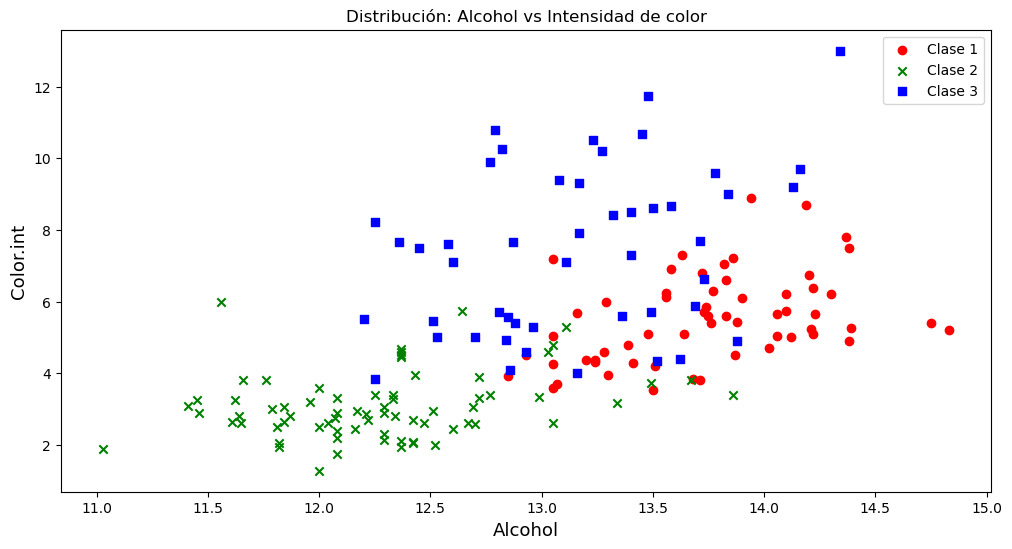

In [786]:
plt.figure(figsize=(12, 6))

# Representación para los tres tipos de vino
plt.scatter(df["Alcohol"][df["Wine"] == 1], df["Color.int"][df["Wine"] == 1], c="r", marker="o", label="Clase 1")
plt.scatter(df["Alcohol"][df["Wine"] == 2], df["Color.int"][df["Wine"] == 2], c="g", marker="x", label="Clase 2")
plt.scatter(df["Alcohol"][df["Wine"] == 3], df["Color.int"][df["Wine"] == 3], c="b", marker="s", label="Clase 3")

plt.xlabel("Alcohol", fontsize=13)
plt.ylabel("Color.int", fontsize=13)
plt.title("Distribución: Alcohol vs Intensidad de color")
plt.legend()
plt.show()

### Reducción del número de características 

### División del conjunto de datos

Como tenemos un dataset multivaluado al que queremos reducir el número de características a dos, tenemos que dejar en el nuevo dataset la columna 'Wine' que contiene los tres tipos de vino y luego dos características a nuestra elección. En este caso se va a trabajar con 'Alcohol' y 'Color.int'

In [790]:
# División del dataset en entrenamiento, validación y prueba
train_val, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set, val_set = train_test_split(train_val, test_size=0.25, random_state=42)

In [791]:
# Separación de características (X) y variable objetivo (y)
X_train = train_set.drop("Wine", axis=1)
y_train = train_set["Wine"].copy()

X_val = val_set.drop("Wine", axis=1)
y_val = val_set["Wine"].copy()

X_test = test_set.drop("Wine", axis=1)
y_test = test_set["Wine"].copy()


### Preparación del conjunto de datos

No hay valores nulos ni infinitos, por lo que no sería necesario realizar una preparación de los datros. Aun así, la preparación de los datos se vería de la siguiente manera.

In [794]:
# Eliminamos el atributo que tiene valores infinitos
# X_train = X_train.drop("", axis=1)
# X_val = X_val.drop("", axis=1)
# X_test = X_test.drop("", axis=1)

# Como no hay valores infinitos, esta parte de código la dejo comentada para que no cause error. 
# Si lo hubiera, en el lugar de las comillas se tendría que poner el campo que tiene dichos valores infinitos.

In [795]:
# Rellenamos los valores nulos con la mediana o la media
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [796]:
# Rellenamos los valores nulos
X_train_prep = imputer.fit_transform(X_train)
X_val_prep = imputer.fit_transform(X_val)
X_test_prep = imputer.fit_transform(X_test)

In [797]:
# Transformamos el resultado a un DataFrame de Pandas
X_train_prep = pd.DataFrame(X_train_prep, columns=X_train.columns, index=y_train.index)
X_val_prep = pd.DataFrame(X_val_prep, columns=X_val.columns, index=y_val.index)
X_test_prep = pd.DataFrame(X_test_prep, columns=X_test.columns, index=y_test.index)

In [798]:
X_train_prep.head(10)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
54,13.74,1.67,2.25,16.4,118.0,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060.0
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0
21,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0
46,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065.0
156,13.84,4.12,2.38,19.5,89.0,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480.0
162,12.85,3.27,2.58,22.0,106.0,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570.0
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0
35,13.48,1.81,2.41,20.5,100.0,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920.0
11,14.12,1.48,2.32,16.8,95.0,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280.0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0


In [799]:
# Comprobamos si hay valores nulos en el conjunto de datos de entrenamiento
is_null = X_train_prep.isna().any()
is_null[is_null]

Series([], dtype: bool)

## Aplicación de KMeans

Vamos a usar K=3 debido a que el dataset tiene 3 clases. La aplicación de KMeans se realiza sobre el conjunto de datos de entrenamiento.

### Conjunto de datos reducido

In [803]:
# Reducimos el conjunto de datos para representarlo gráficamente
X_train_reduced = X_train_prep[["Alcohol", "Color.int"]].copy()

In [804]:
X_train_reduced

,Alcohol,Color.int
54,13.74,5.85
126,12.43,3.94
21,12.93,4.50
46,14.38,4.90
156,13.84,9.01
...,...,...
62,13.67,3.80
134,12.51,5.45
76,13.03,4.60
110,11.46,2.90


### Escalación y normalización de los datos

Esto nos servirá para aplicar KMeans con K=3 posteriormente. 

In [807]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced)

In [808]:
print("X Train Reduced Scaled: \n", X_train_reduced_scaled)

X Train Reduced Scaled: 
 [[ 0.87880076  0.33843125]
 [-0.70272171 -0.48284157]
 [-0.09908718 -0.24204954]
 [ 1.65145296 -0.07005523]
 [ 0.99952767  1.6971863 ]
 [-0.1956687   0.2223351 ]
 [ 1.6031622   3.41282953]
 [ 0.56491081  0.01594193]
 [ 1.337563   -0.02705665]
 [ 1.4703626   0.24813424]
 [ 0.60112888 -0.37104527]
 [ 1.04781843 -0.07005523]
 [-0.87173938 -0.93002677]
 [ 0.84258269 -0.54303958]
 [-0.78723054  1.11240565]
 [ 0.90294614  0.14493766]
 [ 0.04578511 -0.00985722]
 [ 1.45828991  0.56632371]
 [ 0.04578511 -0.11305381]
 [ 0.04578511 -1.05902251]
 [-0.87173938 -1.2525161 ]
 [-1.13733857 -0.99022478]
 [-0.92003014 -0.71503389]
 [ 0.1906574   1.21990209]
 [ 0.66149233  0.45882727]
 [ 0.34760237 -0.47854171]
 [ 0.08200318  1.86488075]
 [ 0.91501883  0.53192485]
 [ 0.11822125  0.87591347]
 [ 0.80636462 -0.52584015]
 [ 0.86672807  0.6695203 ]
 [-0.06286911  0.09333936]
 [-1.68060965 -0.77953175]
 [ 1.02367305 -0.7236336 ]
 [-1.27013817 -0.79673119]
 [-0.37675906 -1.07192208]
 [

### Aplicación de KMeans con K=3 para 2 características

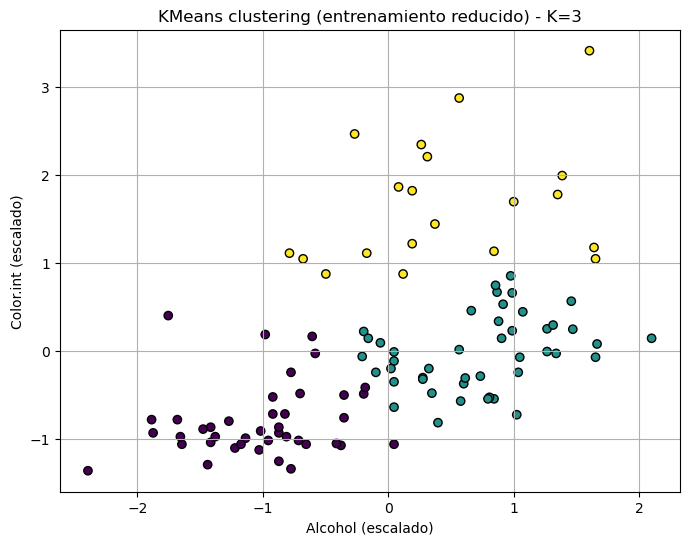

In [810]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Aplicamos KMeans al conjunto reducido y escalado de entrenamiento
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters_train = kmeans.fit_predict(X_train_reduced_scaled)

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(X_train_reduced_scaled[:, 0], X_train_reduced_scaled[:, 1],
            c=clusters_train, cmap="viridis", edgecolor="k")
plt.title("KMeans clustering (entrenamiento reducido) - K=3")
plt.xlabel("Alcohol (escalado)")
plt.ylabel("Color.int (escalado)")
plt.grid(True)
plt.show()

## Aplicación de KMeans con todo el número de características

En esta parte, utilizaremos todo el conjunto de entrenamiento en vez del conjunto reducido como se ha hecho anteriormente para poder utilizar todas las características. K lo mantendremos en 3.

### Escalación de los datos

In [814]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_prep)

In [815]:
print("X Train Scaled: \n", X_train_scaled)

X Train Scaled: 
 [[ 0.87880076 -0.62400647 -0.47913939 ... -0.07921066  0.81745627
   1.09740227]
 [-0.70272171 -0.74031212 -0.33095916 ... -1.02771547  0.32782935
  -1.22201435]
 [-0.09908718  1.14550095  1.00266296 ...  0.37442208  1.25268021
   0.14735874]
 ...
 [ 0.02163973 -1.26368756 -2.47957257 ...  1.03425152 -0.16179758
  -1.09097387]
 [-1.8737727   1.09565567 -2.07207692 ... -0.78027943  0.2870271
  -0.5340518 ]
 [-0.15945063  0.47258968  0.07653649 ... -0.82151877 -1.60347685
  -0.63888419]]


### Aplicación de KMeans con K=3 para todas las características

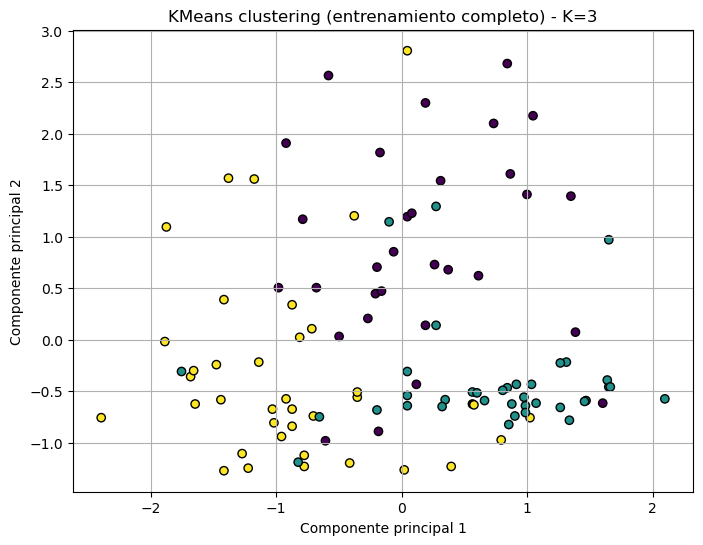

In [817]:
# Aplicamos KMeans al conjunto escalado de entrenamiento
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters_train = kmeans.fit_predict(X_train_scaled)

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=clusters_train, cmap="viridis", edgecolor="k")
plt.title("KMeans clustering (entrenamiento completo) - K=3")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.grid(True)
plt.show()

Al no tener dos ejes delimitados como con el conjunto de entrenamiento reducido a 'Alcohol' y 'Color.int', los ejes 'x' e 'y' no representan características originales, sino combinaciones lineales de ellas. 

## Extracción de las 5 mejores características con Random forest y aplicación de KMeans

### Extracción con Random Forest

In [821]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Entrenamiento del modelo RandomForest con los datos preparados
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_prep, y_train)

RandomForestClassifier(random_state=42)

In [822]:
# Obtener importancias de características
importances = rf_model.feature_importances_
feature_names = X_train_prep.columns

print("Importancia de las características: \n", importances)
print("\n \nNombre de las características: \n", feature_names)

Importancia de las características: 
 [0.09872536 0.0374345  0.01615797 0.0349225  0.0333884  0.0303494
 0.20336489 0.0097781  0.0307251  0.17466741 0.06148507 0.11447025
 0.15453105]

 
Nombre de las características: 
 Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')


In [823]:
# Selección de las 5 más importantes
top_5_indices = np.argsort(importances)[-5:][::-1]
top_5_features = feature_names[top_5_indices]

print("Top 5 características seleccionadas por Random Forest:", list(top_5_features))

Top 5 características seleccionadas por Random Forest: ['Flavanoids', 'Color.int', 'Proline', 'OD', 'Alcohol']


In [824]:
# Crear nuevo dataset reducido con solo esas 5 características
X_train_top5 = X_train_prep[top_5_features]
X_val_top5 = X_val_prep[top_5_features]

### KMeans para las 5 mejores características

Volveremos a seleccionar K=3 para mantener la corcondancia del desarrollo.

In [827]:
### Escalación de los datos

In [828]:
scaler = StandardScaler()
X_train_top5_scaled = scaler.fit_transform(X_train_top5)

In [829]:
print("Top 5 X Train Scaled with Random Forest: \n", X_train_top5_scaled)

Top 5 X Train Scaled with Random Forest: 
 [[ 8.77330751e-01  3.38431255e-01  1.09740227e+00  8.17456273e-01
   8.78800761e-01]
 [ 1.12492676e+00 -4.82841571e-01 -1.22201435e+00  3.27829348e-01
  -7.02721708e-01]
 [ 3.92042581e-01 -2.42049538e-01  1.47358736e-01  1.25268021e+00
  -9.90871776e-02]
 [ 1.14473444e+00 -7.00552292e-02  1.11378233e+00  1.14387422e+00
   1.65145296e+00]
 [-1.17276417e+00  1.69718630e+00 -8.02684795e-01 -1.30426040e+00
   9.99527667e-01]
 [-1.40055250e+00  2.22335096e-01 -5.07843699e-01 -6.65025249e-01
  -1.95668702e-01]
 [-6.97379843e-01  3.41282953e+00 -2.13002603e-01 -8.69036467e-01
   1.60316220e+00]
 [ 9.56561473e-01  1.59419253e-02  6.38760563e-01  1.18467647e+00
   5.64910806e-01]
 [ 4.11850261e-01 -2.70566519e-02  1.81812495e+00  3.00627852e-01
   1.33756300e+00]
 [ 1.03579219e+00  2.48134243e-01  1.11378233e+00  1.79671012e+00
   1.47036260e+00]
 [ 5.10888663e-01 -3.71045270e-01  1.21206269e+00  3.68631592e-01
   6.01128877e-01]
 [-1.65805234e+00 -7.0

In [830]:
### Aplicación de KMeans con K=3 para las 5 características

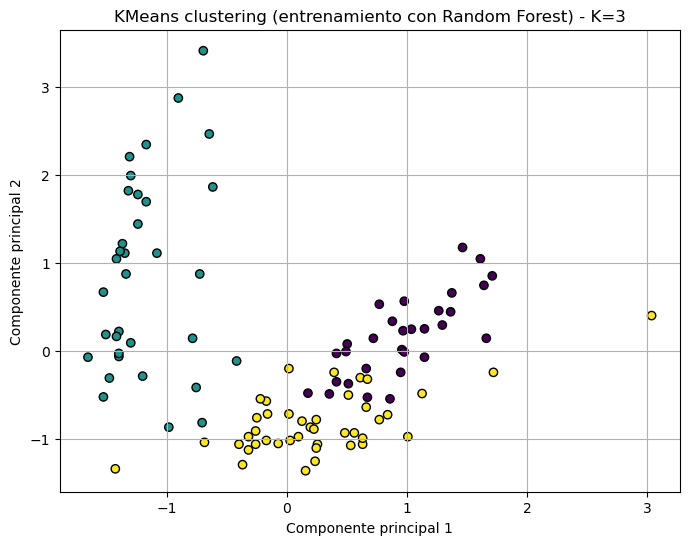

In [831]:
# Aplicamos KMeans al conjunto reducido y escalado de entrenamiento
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters_train = kmeans.fit_predict(X_train_top5_scaled)

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(X_train_top5_scaled[:, 0], X_train_top5_scaled[:, 1],
            c=clusters_train, cmap="viridis", edgecolor="k")
plt.title("KMeans clustering (entrenamiento con Random Forest) - K=3")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.grid(True)
plt.show()

## Extración de las 5 mejores características con PCA y aplicación de KMeans

In [833]:
### Escalación de los datos

Para el correcto funcionamiento del procedimiento PCA, el escalado debe de ser realizado previamente. Como ya se ha procesado con anteriorizad el escalado de conjunto entero de los datos de entrenamiento (X_train_scaled), no tiene que ser realizado nuevamente.

In [835]:
### Extracción con PCA

In [836]:
from sklearn.decomposition import PCA

# Aplicación de PCA para reducir a 5 componentes
pca = PCA(n_components=5, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)

In [837]:
print("Top 5 X Train Scaled with PCA: \n", X_train_pca)

Top 5 X Train Scaled with PCA: 
 [[ 2.21442807e+00  1.03104849e+00 -1.08696891e+00 -2.09977359e-01
   5.11460913e-01]
 [ 1.34700664e-01 -1.30330363e+00  7.98270343e-01  1.29540730e+00
   1.34248077e-01]
 [ 1.12491518e+00  1.09809163e-01  8.29896565e-01  6.12547760e-01
  -4.09843949e-01]
 [ 2.67737725e+00  1.16794101e+00 -5.61182434e-01  1.15931829e+00
  -1.12712511e+00]
 [-2.86249479e+00  1.63221957e+00 -7.62844704e-01  1.24553583e+00
  -4.44143616e-01]
 [-2.71089669e+00  4.17249974e-01  6.44532487e-01 -1.13996826e+00
   4.33105453e-02]
 [-1.21563934e+00  3.57006184e+00  1.32250164e+00  1.43191230e+00
   4.68358781e-01]
 [ 1.90823222e+00  2.09843702e-01  4.18592399e-01  1.90553507e-01
  -4.29902292e-01]
 [ 1.76818139e+00  6.79905445e-01 -1.31638668e+00 -9.02395833e-01
  -1.15624124e+00]
 [ 3.32144962e+00  1.60927815e+00 -2.93329166e-01 -2.17630553e-01
   4.96807872e-01]
 [ 1.46590113e+00  7.25167540e-01  2.78697615e-01 -1.20993949e+00
  -2.16820102e-01]
 [-4.12446897e+00  1.12031011e-0

In [838]:
### Aplicación de KMeans con K=3 para las 5 características

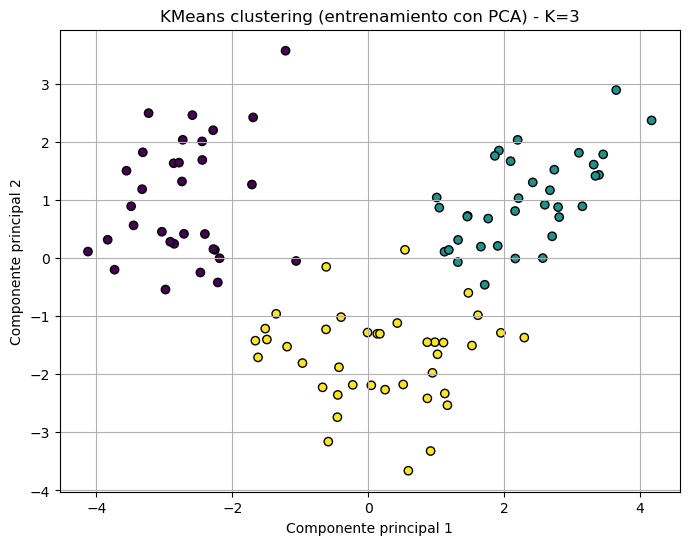

In [839]:
# Aplicamos KMeans al conjunto reducido y escalado de entrenamiento
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters_train = kmeans.fit_predict(X_train_pca)

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
            c=clusters_train, cmap="viridis", edgecolor="k")
plt.title("KMeans clustering (entrenamiento con PCA) - K=3")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.grid(True)
plt.show()

In [840]:
## Conclusiones

| Método                                      | Nº de Características | Descripción                                                  | Separación Visual de Clústeres         | Complejidad del Proceso | Diferencias Visuales / Comentarios                                                                                     |
|--------------------------------------------|------------------------|--------------------------------------------------------------|----------------------------------------|--------------------------|------------------------------------------------------------------------------------------------------------------------|
| KMeans con entrenamiento reducido          | 2 (Alcohol, Color.int) | Se escalan solo dos características elegidas manualmente     | Moderada                               | Muy baja                 | Fácil de visualizar en 2D. La separación de clústeres es aceptable pero algo solapada                                  |
| KMeans con todas las características       | 13                     | Se usa el dataset completo tras escalar                      | Alta                                   | Media                    | Mejora clara en la segmentación de los clústeres gracias a más información disponible                                   |
| KMeans con 5 características (RandomForest)| 5 (Flavanoids, Color.int, Proline, OD, Alcohol) | Selección supervisada basada en su capacidad predictiva (`y`) | Buena, algo compacta                   | Media-alta               | Buen rendimiento general. Aunque supervisado, visualmente la separación entre clústeres no es tan amplia como en PCA  |
| KMeans con 5 características (PCA)         | 5                      | Reducción no supervisada basada en la varianza de los datos  | Muy alta, clústeres más dispersos      | Alta                     | PCA logra una representación más espaciosa visualmente. Aun sin usar el target, separa mejor los grupos en este caso  |
